# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multi-output ANN (iris dataset)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\U7W20E6\AppData\Local\Temp/ipykernel_23236/2804498948.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris', data_home='../seaborn-data-master')

# check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


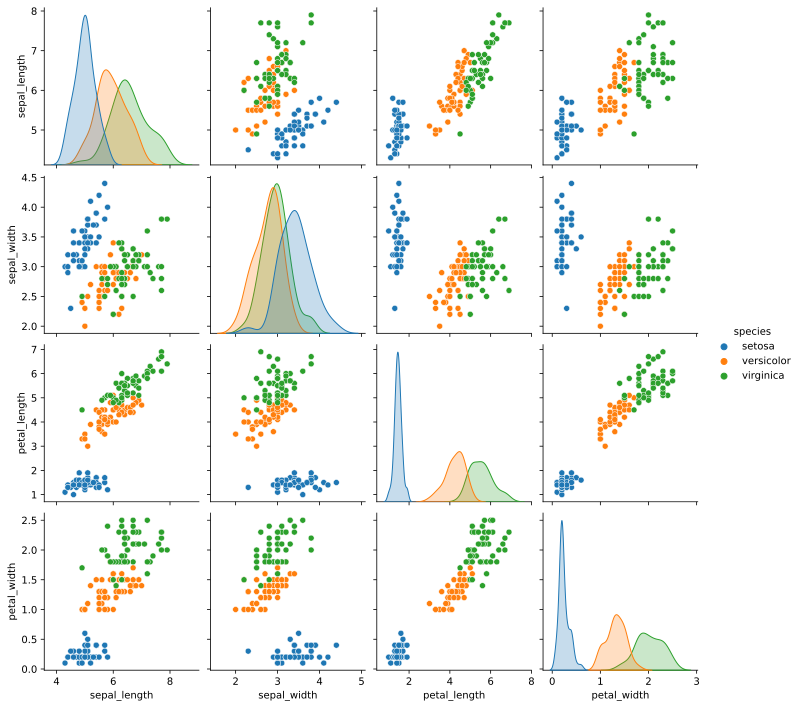

In [3]:
# some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [4]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Create the ANN model

In [5]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

# Train the model

In [8]:
def compute_accuracy(yHat, labels):
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  return accuracyPct


numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []
setosa_acc = []
versicolor_acc = []
virginica_acc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNiris(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  ongoingAcc.append( compute_accuracy(yHat, labels) )              # add to list of accuracies
  setosa_acc.append( compute_accuracy(yHat[labels == 0], labels[labels == 0]) )              # add to list of accuracies
  versicolor_acc.append( compute_accuracy(yHat[labels == 1], labels[labels == 1]) )              # add to list of accuracies
  virginica_acc.append( compute_accuracy(yHat[labels == 2], labels[labels == 2]) )              # add to list of accuracies



# final forward pass
predictions = ANNiris(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

tensor([[ 7.2331e+00,  2.2805e+00, -1.0854e+01],
        [ 6.4213e+00,  2.2374e+00, -9.8439e+00],
        [ 6.6704e+00,  2.1172e+00, -1.0026e+01],
        [ 6.2161e+00,  2.1061e+00, -9.4805e+00],
        [ 7.2790e+00,  2.2357e+00, -1.0861e+01],
        [ 7.5708e+00,  2.4321e+00, -1.1411e+01],
        [ 6.7170e+00,  2.0785e+00, -1.0044e+01],
        [ 6.9147e+00,  2.2570e+00, -1.0453e+01],
        [ 5.9294e+00,  2.0213e+00, -9.0570e+00],
        [ 6.4523e+00,  2.2359e+00, -9.8783e+00],
        [ 7.5940e+00,  2.4086e+00, -1.1406e+01],
        [ 6.6373e+00,  2.1797e+00, -1.0056e+01],
        [ 6.3685e+00,  2.1882e+00, -9.7302e+00],
        [ 6.3485e+00,  1.9383e+00, -9.4619e+00],
        [ 8.5987e+00,  2.5428e+00, -1.2714e+01],
        [ 8.6583e+00,  2.5232e+00, -1.2763e+01],
        [ 8.0416e+00,  2.3962e+00, -1.1915e+01],
        [ 7.2264e+00,  2.2851e+00, -1.0849e+01],
        [ 7.6633e+00,  2.5703e+00, -1.1650e+01],
        [ 7.4772e+00,  2.2828e+00, -1.1141e+01],
        [ 6.9209e+00

# Visualize the results

Final accuracy: 98%
Final setosa accuracy: 100%
Final virginica accuracy: 100%
Final versicolor accuracy: 94%


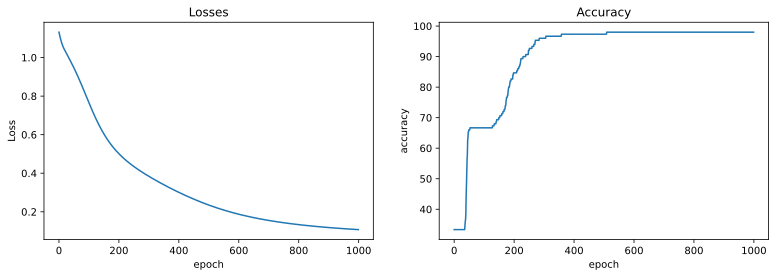

In [22]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)
print('Final setosa accuracy: %g%%' %setosa_acc[-1])
print('Final virginica accuracy: %g%%' %virginica_acc[-1])
print('Final versicolor accuracy: %g%%' %versicolor_acc[-1])

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [15]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

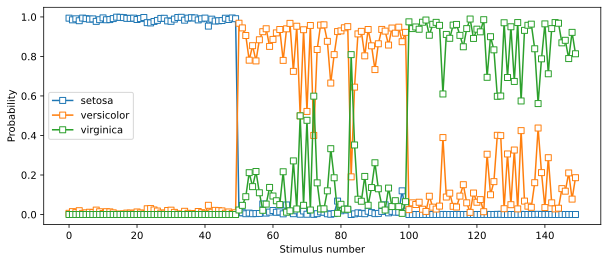

In [16]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# try it again without the softmax!

# Additional explorations

In [ ]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).
# 
# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?
# 
# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.
# 